In [1]:
import PlottingClassesSPS_offline 
from PlottingClassesSPS_offline import FBCT
import datascout as ds 
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd

In [3]:
data = ds.parquet_to_dict('./FBCT_RING/2022.11.02.16.34.30.680255.parquet')
data;

In [4]:
data['SPS.BCTW.31931/Acquisition']['value']['bunchIntensity'].shape


(1248, 924)

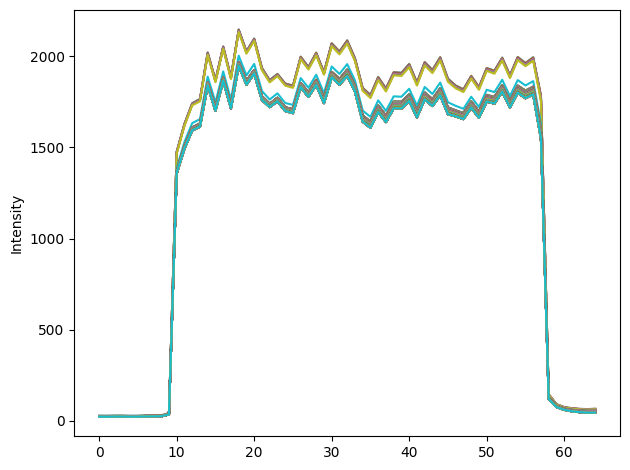

In [5]:
b1 = data['SPS.BCTW.31931/Acquisition']['value']['bunchIntensity'][400][0:]
b2 = data['SPS.BCTW.31931/Acquisition']['value']['bunchIntensity'][500]


for i in range(400,1000,6):
    plt.plot(data['SPS.BCTW.31931/Acquisition']['value']['bunchIntensity'][i][10:75], )
    plt.grid()
    plt.ylabel('Intensity')
    plt.tight_layout()




    

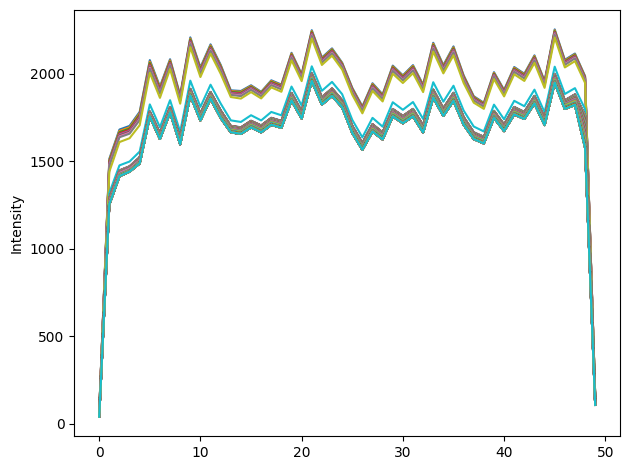

In [7]:
for i in range(400,1000,6):
    plt.plot(data['SPS.BCTW.31931/Acquisition']['value']['bunchIntensity'][i][129:130+49] )
    plt.grid()
    plt.ylabel('Intensity')
    plt.tight_layout()

In [8]:
batch1 = np.array([1477.7334  , 1630.0688  , 1742.8754  , 1766.1554  , 2021.4541  ,
       1870.056   , 2054.265   , 1887.7114  , 2147.5413  , 2028.1726  ,
       2097.3877  , 1936.615   , 1869.5874  , 1903.4918  , 1851.1509  ,
       1839.4326  , 1998.1741  , 1941.4585  , 2020.2042  , 1913.1787  ,
       2071.9204  , 2027.079   , 2087.7007  , 1990.2059  , 1826.7772  ,
       1788.8103  , 1886.7739  , 1824.2773  , 1913.335   , 1910.054   ,
       1958.3326  , 1857.088   , 1968.4883  , 1925.3656  , 1995.3618  ,
       1877.7119  , 1840.0577  , 1819.4338  , 1893.0236  , 1831.7769  ,
       1935.8339  , 1921.3033  , 1993.0182  , 1896.6171  , 1996.6117  ,
       1963.6449  , 1994.8931  , 1785.6855  ])
batch1.shape 

# threshold is above  1000 in intensity ! nice so we can integrate all of this over time and see how the batch intensity decreases... 

# we can see longitudinally to verify the noise level 
 
    
# define the noise threshold 





(48,)

In [9]:
def calculate_intensity_FBCT(data, plot=True):
    total_intensity_1 = []
    total_intensity_2 = []
    total_intensity_3 = []
    for i in range(1248):
        total_intensity_1.append(np.sum(data['SPS.BCTW.31931/Acquisition']['value']['bunchIntensity'][i, 20:20+48]/1000)) # only the first batch 
        total_intensity_2.append(np.sum(data['SPS.BCTW.31931/Acquisition']['value']['bunchIntensity'][i, 75:75+48]/1000)) # only the first batch 
        total_intensity_3.append(np.sum(data['SPS.BCTW.31931/Acquisition']['value']['bunchIntensity'][i, 130:130+48]/1000)) # only the first batch 

    if plot==True:
        plt.plot(data['SPS.BCTW.31931/Acquisition']['value']['measStamp'],total_intensity_1, label='Total Intensity all bunches in batch 1', )
        plt.plot(data['SPS.BCTW.31931/Acquisition']['value']['measStamp'],total_intensity_2, label='Total Intensity all bunches in batch 2')
        plt.plot(data['SPS.BCTW.31931/Acquisition']['value']['measStamp'],total_intensity_3, label='Total Intensity all bunches in batch 3')


        plt.grid()
        plt.ylabel('Intensity 1e11')
        plt.legend()
        plt.xlabel('Cycle time after first injection (ms)')
        plt.tight_layout()
        plt.title(pd.Timestamp(data['SPS.BCTW.31931/Acquisition']['header']['cycleStamp']))

        plt.show()
        
    return total_intensity_1

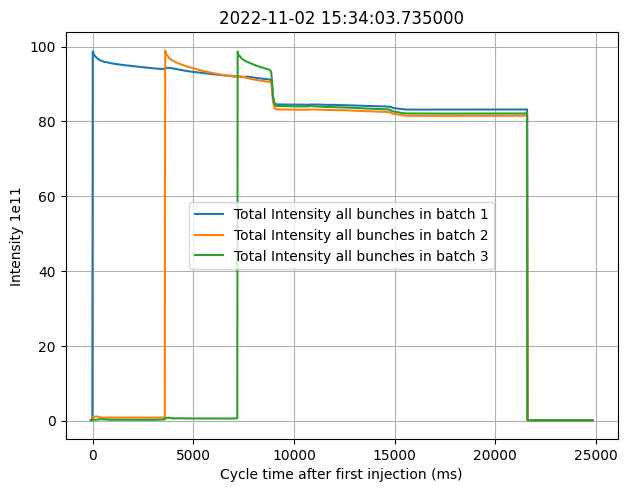

In [212]:
fbct_int = calculate_intensity_FBCT(data)

In [10]:
data

{'SPS.BCTW.31931/Acquisition': {'exception': '',
  'header': {'acqStamp': 1667403269660000000,
   'cycleStamp': 1667403243735000000,
   'isFirstUpdate': False,
   'isImmediateUpdate': False,
   'selector': 'SPS.USER.LHCMD1',
   'setStamp': 0},
  'value': {'acqDesc': '',
   'acqMsg': ' - Acq OK',
   'acqState': {'JAPC_ENUM_SET': {'asLong': 261633,
     'codes': array([     1,    512,   1024,   2048,   4096,   8192,  16384,  32768,
             65536, 131072]),
     'strings': array(['OK', 'FIRST_INJ_RCVED', 'LAST_INJ_RCVED', 'FLAT_TOP_RCVED',
            'DUMP_RCVED', 'FAST_EXTRACTION_RCVED', 'INTERLOCK_ACQ_RCVED',
            'CAPTURE_REQUESTED', 'CAPTURE_RCVED', 'EXPERT_CAPTURE_REQUESTED'],
           dtype='<U24')}},
   'acqTime': '2022/11/02 15:34:04.650238',
   'beamDetected': True,
   'beamID': 63873,
   'bunchIntensity': array([[2.079405 , 2.0325012, 2.1106741, ..., 2.126309 , 2.0950396,
           2.0950396],
          [2.0481358, 2.0637703, 2.0950396, ..., 2.079405 , 2.079405 ,